In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve,f1_score,precision_score,recall_score

In [51]:
df = pd.read_csv('/Users/arfatshaikh/Documents/Machine-Learning-1/Bank Churn Prediction/BankChurners.csv')

In [52]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [54]:
df.isna().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [55]:
df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], inplace=True)

In [56]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(df[i].value_counts())
        print('\n')
        print('***************'*10)

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64


******************************************************************************************************************************************************
Gender
F    5358
M    4769
Name: count, dtype: int64


******************************************************************************************************************************************************
Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64


******************************************************************************************************************************************************
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64


****************************************************************************************

In [57]:
def outlier_detection(df, i):
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[i] < lower_bound) | (df[i] > upper_bound)]
    print(f"Outliers in {i}:",outliers.shape[0])
    return lower_bound, upper_bound

In [58]:
for i in df.columns:
    if df[i].dtype == 'int64' or df[i].dtype == 'float64':
        outlier_detection(df, i)

Outliers in CLIENTNUM: 0
Outliers in Customer_Age: 2
Outliers in Dependent_count: 0
Outliers in Months_on_book: 386
Outliers in Total_Relationship_Count: 0
Outliers in Months_Inactive_12_mon: 331
Outliers in Contacts_Count_12_mon: 629
Outliers in Credit_Limit: 984
Outliers in Total_Revolving_Bal: 0
Outliers in Avg_Open_To_Buy: 963
Outliers in Total_Amt_Chng_Q4_Q1: 396
Outliers in Total_Trans_Amt: 896
Outliers in Total_Trans_Ct: 2
Outliers in Total_Ct_Chng_Q4_Q1: 394
Outliers in Avg_Utilization_Ratio: 0


In [59]:
pd.set_option('display.max_columns', None)

In [60]:
df.head(1)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061


In [61]:
df['CLIENTNUM'].count()

np.int64(10127)

In [62]:
df['Card_Category'].value_counts(normalize=True)

Card_Category
Blue        0.931767
Silver      0.054804
Gold        0.011455
Platinum    0.001975
Name: proportion, dtype: float64

## Preprocessing

In [63]:
df['Attrition_Flag'] = np.where(df['Attrition_Flag'] == 'Existing Customer', 0, 1)

In [64]:
gender_dummies = pd.get_dummies(df['Gender'],prefix="Gender").astype(int)

In [65]:
marital_dummies = pd.get_dummies(df['Marital_Status'],prefix="Marital").astype(int)

In [66]:
incomem_dummies = pd.get_dummies(df['Income_Category'],prefix="Income").astype(int)

In [67]:
Ord_end = OrdinalEncoder(categories=[['Unknown', 'Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate','Doctorate']])
df['Education_Level'] = Ord_end.fit_transform(df[['Education_Level']])
df['Education_Level'] = df['Education_Level'].astype(int)


In [ ]:
Ord_end = OrdinalEncoder(categories=[['Blue', 'Silver', 'Gold', 'Platinum']])
df['Card_Category']= Ord_end.fit_transform(df[['Card_Category']]).astype(int)

In [76]:
df.drop(columns=['CLIENTNUM','Marital_Status','Gender','Income_Category'], inplace=True)

In [81]:
df = pd.concat([df,gender_dummies, marital_dummies, incomem_dummies], axis=1)

In [85]:
df.head(1)

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Divorced,Marital_Married,Marital_Single,Marital_Unknown,Income_$120K +,Income_$40K - $60K,Income_$60K - $80K,Income_$80K - $120K,Income_Less than $40K,Income_Unknown,Amt_per_trx
0,0,45,3,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,1,0,1,0,0,0,0,1,0,0,0,27.238095


In [83]:
df['Amt_per_trx'] = df['Total_Trans_Amt']/df['Total_Trans_Ct']

In [88]:
num_cols = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
            'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
            'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt','Total_Trans_Ct',
            'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Amt_per_trx']

In [86]:
X = df.copy()

In [89]:
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [90]:
X[num_cols].describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Amt_per_trx
count,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04
mean,1.361166e-16,-8.419584e-17,-3.437997e-16,-4.490445e-17,1.571656e-16,-7.858279e-17,1.234872e-16,-8.419584e-17,3.367834e-17,-1.347133e-16,-4.490445e-17,-1.796178e-16,1.571656e-16,1.010350e-16,-8.980890e-17
std,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00
min,-2.535541e+00,-1.806378e+00,-2.871068e+00,-1.809512e+00,-2.316674e+00,-2.219655e+00,-7.915266e-01,-1.426858e+00,-8.213361e-01,-3.466947e+00,-1.146344e+00,-2.337256e+00,-2.991597e+00,-9.971550e-01,-1.646592e+00
25%,-6.643815e-01,-1.036462e+00,-6.171294e-01,-5.227845e-01,-3.375979e-01,-4.116160e-01,-6.686548e-01,-9.863389e-01,-6.759604e-01,-5.882438e-01,-6.619405e-01,-8.460801e-01,-5.469820e-01,-9.137243e-01,-5.718367e-01
50%,-4.066159e-02,-2.665471e-01,8.964513e-03,1.205790e-01,-3.375979e-01,-4.116160e-01,-4.492525e-01,1.388875e-01,-4.394979e-01,-1.092203e-01,-1.486877e-01,9.123036e-02,-4.293775e-02,-3.587287e-01,-2.582234e-01
75%,7.078024e-01,5.033681e-01,5.098397e-01,7.639426e-01,6.519402e-01,4.924038e-01,2.679862e-01,7.622408e-01,2.629041e-01,4.519214e-01,9.918090e-02,6.877007e-01,4.443050e-01,8.274384e-01,1.084713e-01
max,3.327426e+00,2.043199e+00,2.513340e+00,1.407306e+00,3.620555e+00,3.204463e+00,2.848054e+00,1.661686e+00,2.975375e+00,1.203060e+01,4.144855e+00,3.158792e+00,1.260857e+01,2.626640e+00,4.832064e+00


In [91]:
X.head(1)

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Divorced,Marital_Married,Marital_Single,Marital_Unknown,Income_$120K +,Income_$40K - $60K,Income_$60K - $80K,Income_$80K - $120K,Income_Less than $40K,Income_Unknown,Amt_per_trx
0,0,-0.165406,0.503368,2,0,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882,0,1,0,1,0,0,0,0,1,0,0,0,-1.339801


In [92]:
X['Attrition_Flag'].value_counts()

Attrition_Flag
0    8500
1    1627
Name: count, dtype: int64

In [93]:
x = X.drop(columns=['Attrition_Flag'])
y = X['Attrition_Flag']

In [101]:
sm = SMOTE(random_state=42)
x_resampled, y_resampled = sm.fit_resample(x, y)

In [102]:
x_resampled.shape, y_resampled.shape

((17000, 29), (17000,))

In [103]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

## Logistic Regression

In [170]:
logistic_regression = LogisticRegression(max_iter=1000, random_state=42,C = 0.1,penalty='l2')

In [171]:
accuracy_scores_test = []
accuracy_scores_train= []
for split,(train_idx,test_idx) in enumerate(kf.split(x_resampled)):
    X_train, X_test = x_resampled.iloc[train_idx], x_resampled.iloc[test_idx]
    y_train, y_test = y_resampled.iloc[train_idx], y_resampled.iloc[test_idx]
    
    logistic_regression.fit(X_train, y_train)
    y_pred = logistic_regression.predict(X_test)
    y_pred_train = logistic_regression.predict(X_train)
    accuracy_test = recall_score(y_test, y_pred)
    accuracy_scores_test.append(accuracy_test)
    accuracy_train = recall_score(y_train, y_pred_train)
    accuracy_scores_train.append(accuracy_train)
    print(f"Fold {split+1} - Accuracy Test: {accuracy_test:.4f}, Accuracy Train: {accuracy_train:.4f}")

print(f"Average Accuracy Test: {np.mean(accuracy_scores_test):.4f}, Average Accuracy Train: {np.mean(accuracy_scores_train):.4f}")
    

Fold 1 - Accuracy Test: 0.9113, Accuracy Train: 0.9117
Fold 2 - Accuracy Test: 0.8955, Accuracy Train: 0.9146
Fold 3 - Accuracy Test: 0.9160, Accuracy Train: 0.9110
Fold 4 - Accuracy Test: 0.9168, Accuracy Train: 0.9102
Fold 5 - Accuracy Test: 0.9163, Accuracy Train: 0.9103
Average Accuracy Test: 0.9111, Average Accuracy Train: 0.9116


In [158]:
df.shape

(10127, 30)

In [163]:
logistic_regression.coef_

array([[-0.06824713,  0.18505003, -0.04563   , -0.15601404, -0.03826671,
        -0.66520927,  0.5272055 ,  0.55514481, -0.03676374, -0.65618114,
         0.02207116, -0.23697523, -1.36878028, -1.7238603 , -0.76496681,
        -0.09634617, -0.82550853, -1.77291934, -2.06529763, -2.33468328,
        -1.88629288, -2.1607719 , -1.57973457, -2.33897825, -1.93615685,
        -1.71071278, -1.86060569, -2.3448454 ,  2.03490461]])

In [167]:
x_resampled.columns

Index(['Customer_Age', 'Dependent_count', 'Education_Level', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_F', 'Gender_M', 'Marital_Divorced', 'Marital_Married',
       'Marital_Single', 'Marital_Unknown', 'Income_$120K +',
       'Income_$40K - $60K', 'Income_$60K - $80K', 'Income_$80K - $120K',
       'Income_Less than $40K', 'Income_Unknown', 'Amt_per_trx'],
      dtype='object')

In [174]:
from sklearn.metrics import classification_report

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1680
           1       0.91      0.92      0.91      1720

    accuracy                           0.91      3400
   macro avg       0.91      0.91      0.91      3400
weighted avg       0.91      0.91      0.91      3400



## Decision Tree

In [220]:
DT = DecisionTreeClassifier(criterion = 'gini',max_depth = 10, random_state=42,min_samples_split=5,min_samples_leaf=2)

In [221]:
accuracy_scores_test = []
accuracy_scores_train= []
for split,(train_idx,test_idx) in enumerate(kf.split(x_resampled)):
    X_train, X_test = x_resampled.iloc[train_idx], x_resampled.iloc[test_idx]
    y_train, y_test = y_resampled.iloc[train_idx], y_resampled.iloc[test_idx]
    
    DT.fit(X_train, y_train)
    y_pred = DT.predict(X_test)
    y_pred_train = DT.predict(X_train)
    accuracy_test = recall_score(y_test, y_pred)
    accuracy_scores_test.append(accuracy_test)
    accuracy_train = recall_score(y_train, y_pred_train)
    accuracy_scores_train.append(accuracy_train)
    print(f"Fold {split+1} - Accuracy Test: {accuracy_test:.4f}, Accuracy Train: {accuracy_train:.4f}")

print(f"Average Accuracy Test: {np.mean(accuracy_scores_test):.4f}, Average Accuracy Train: {np.mean(accuracy_scores_train):.4f}")
    

Fold 1 - Accuracy Test: 0.9437, Accuracy Train: 0.9756
Fold 2 - Accuracy Test: 0.9542, Accuracy Train: 0.9768
Fold 3 - Accuracy Test: 0.9550, Accuracy Train: 0.9771
Fold 4 - Accuracy Test: 0.9486, Accuracy Train: 0.9759
Fold 5 - Accuracy Test: 0.9552, Accuracy Train: 0.9789
Average Accuracy Test: 0.9513, Average Accuracy Train: 0.9769


## RandomForest

In [244]:
RF = RandomForestClassifier(n_estimators=80, random_state=42,criterion='gini',max_depth=8,min_samples_split=5,min_samples_leaf=2)

In [248]:
accuracy_scores_test = []
accuracy_scores_train= []
for split,(train_idx,test_idx) in enumerate(kf.split(x_resampled)):
    X_train, X_test = x_resampled.iloc[train_idx], x_resampled.iloc[test_idx]
    y_train, y_test = y_resampled.iloc[train_idx], y_resampled.iloc[test_idx]
    
    RF.fit(X_train, y_train)
    y_pred = RF.predict(X_test)
    y_pred_train = RF.predict(X_train)
    accuracy_test = recall_score(y_test, y_pred)
    accuracy_scores_test.append(accuracy_test)
    accuracy_train = recall_score(y_train, y_pred_train)
    accuracy_scores_train.append(accuracy_train)
    print(f"Fold {split+1} - Accuracy Test: {accuracy_test:.4f}, Accuracy Train: {accuracy_train:.4f}")

print(f"Average Accuracy Test: {np.mean(accuracy_scores_test):.4f}, Average Accuracy Train: {np.mean(accuracy_scores_train):.4f}")
    

Fold 1 - Accuracy Test: 0.9739, Accuracy Train: 0.9841
Fold 2 - Accuracy Test: 0.9762, Accuracy Train: 0.9860
Fold 3 - Accuracy Test: 0.9751, Accuracy Train: 0.9836
Fold 4 - Accuracy Test: 0.9711, Accuracy Train: 0.9860
Fold 5 - Accuracy Test: 0.9756, Accuracy Train: 0.9845
Average Accuracy Test: 0.9744, Average Accuracy Train: 0.9848


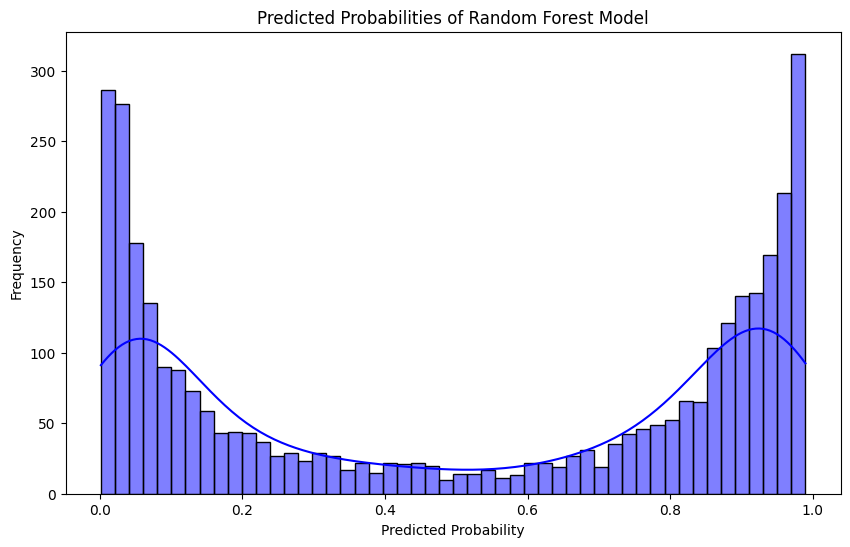

In [253]:
# Get predicted probabilities for the test set
y_pred_proba = RF.predict_proba(X_test)[:, 1]

# Plot the predicted probabilities
plt.figure(figsize=(10, 6))
sns.histplot(y_pred_proba, bins=50, kde=True, color='blue')
plt.title('Predicted Probabilities of Random Forest Model')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()

In [254]:
import sklearn.calibration as calibration

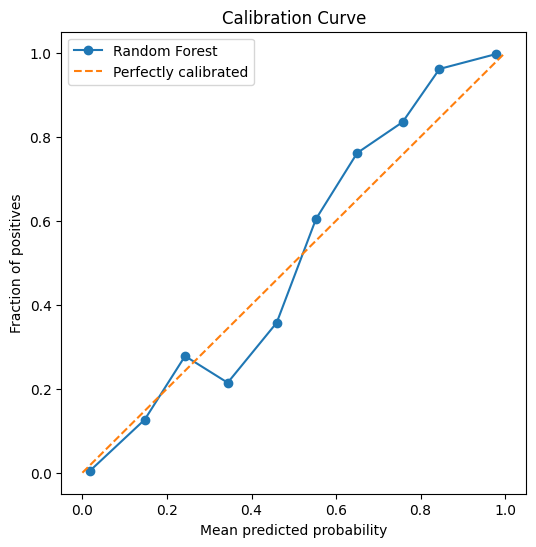

In [257]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y_test, y_prob_cal, n_bins=10)

plt.figure(figsize=(6, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Random Forest')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration Curve')
plt.legend()
plt.show()


In [260]:
from sklearn.metrics import brier_score_loss

brier_score = brier_score_loss(y_test, y_pred_proba)
print(f"Brier score: {brier_score:.4f}")


Brier score: 0.0417


In [250]:
RF.predict_proba(X_train)[:, 1]

array([0.07128295, 0.16346858, 0.18759201, ..., 0.897667  , 0.60964559,
       0.75109408], shape=(13600,))

In [256]:
from sklearn.calibration import CalibratedClassifierCV

calibrated_rf = CalibratedClassifierCV(RF, method='isotonic', cv=5)
calibrated_rf.fit(X_train, y_train)

y_prob_cal = calibrated_rf.predict_proba(X_test)[:, 1]


In [222]:
RV = RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={"max_depth": [3, 5, 7, 10],
                   "min_samples_split": [2, 5, 10],
                   "min_samples_leaf": [1, 2, 4]},
                   scoring='recall',
                   cv=kf,
                   n_iter=10,
                   random_state=42,
                   verbose=1)

In [223]:
RV.fit(x_resampled, y_resampled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'max_depth': [3, 5, 7, 10],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, scoring='recall', verbose=1)

In [224]:
RV.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [225]:
RV.best_params_

{'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10}

In [226]:
RV.best_score_

np.float64(0.951341807058132)